# Control of a Spreading Disease

## Social Distancing
 
 - Make infectious rate ($\beta$) lower - การรักษาระยะห่างทางสังคมจะทำให้อัตราการติดเชื้อต่ำลง
 - Good with high revovery rate ($\gamma$) - ดีถ้าเรามีอัตราการรักษาที่สูง
 - Delay critical situation (peak infection) - ซื้อเวลาไม่ให้เหตุการณ์มันถึงจุดวิกฤติเร็วเกินไป

/var/folders/d1/r7rwb7dx3nzbm5pb0tlf2h_40000gn/T/ipykernel_8270/3061463799.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z[i+1] = np.array([[S_new, I_new, R_new]]).T


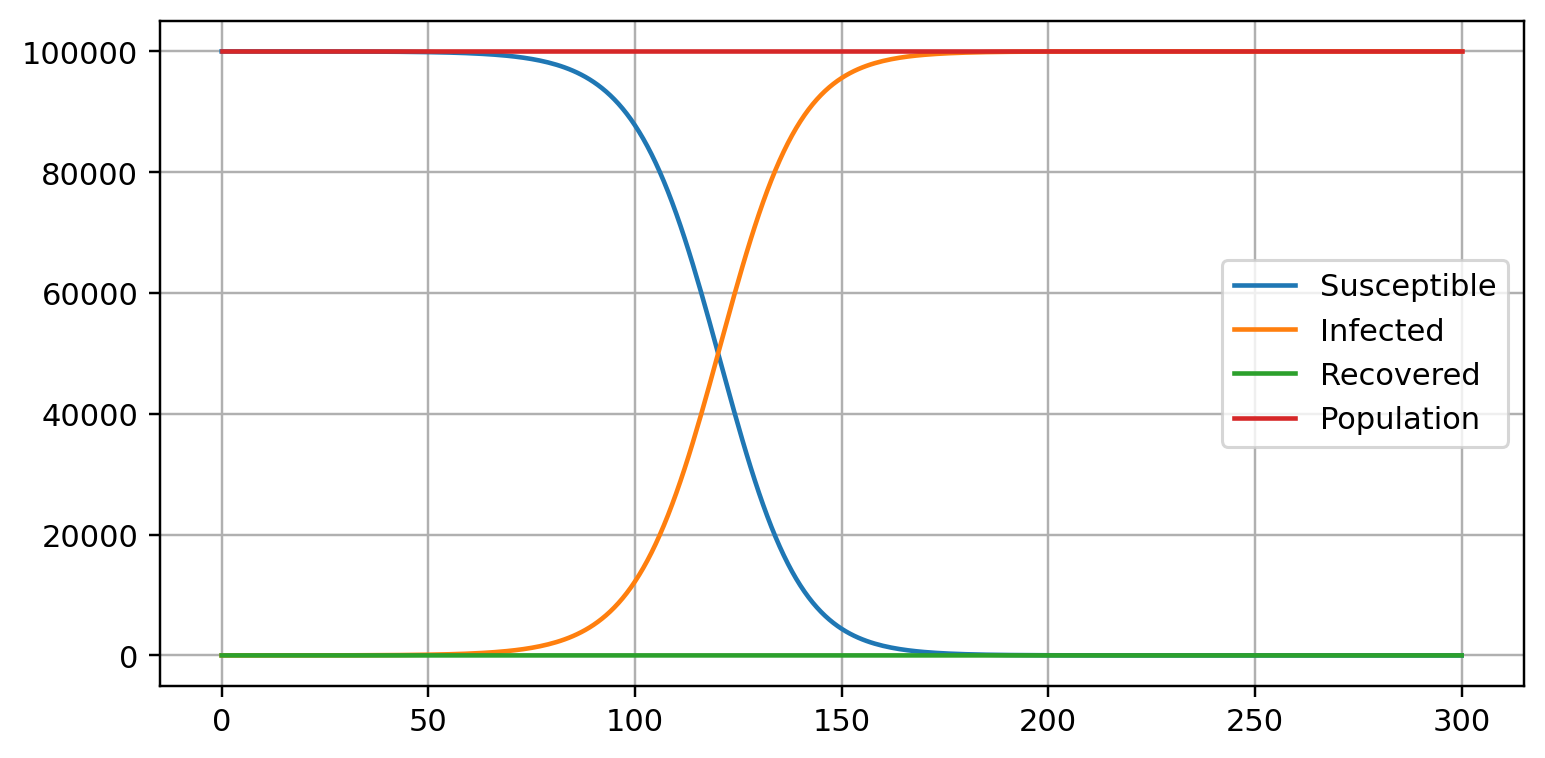

In [3]:
import numpy as np
import matplotlib.pyplot as plt
        

S0 = 99999
I0 = 1
R0 = 0
Population = S0 + I0 + R0

Beta = [2E-5, 1E-5, 2E-6, 1E-6]

# Without Social Distancing: higher beta
# beta = Beta[0]

# With Social Distancing: lower beta
beta = Beta[3]

gamma = 0.00000001

time = 300


def cutpop(x, lb, ub):
    if not (lb <= x <= ub):
        y = 0
    else:
        y = x
    return y


X0 = np.array([[S0, I0, R0]]).T
Z = np.zeros((time+1, 3, 1))
Z[0] = X0

for i in range(time):
    X_now = Z[i]
    S_now = X_now[0]
    I_now = X_now[1]
    R_now = X_now[2]
    
    
    S_new = S_now - beta * S_now * I_now
    S_new = cutpop(S_new, 0.1, Population)
    
    I_new = I_now + beta * S_now * I_now - gamma * I_now
    I_new = cutpop(I_new, 0.1, Population)
    
    R_new = Population - (S_new + I_new)
  
    Z[i+1] = np.array([[S_new, I_new, R_new]]).T
    
S = Z[:, 0, :]
I = Z[:, 1, :]
R = Z[:, 2, :]
N = S + I + R

TIME = np.linspace(0, time, num=time+1, dtype='int')

plt.figure(figsize=(8,4), dpi=220)
plt.plot(TIME, S, label='Susceptible')
plt.plot(TIME, I, label='Infected')
plt.plot(TIME, R, label='Recovered')
plt.plot(TIME, N, label='Population')
plt.legend()
plt.grid()

## Quarantination / Isolation

 - Isolate infectious people ($I$) from the susceptible group ($S$)

/var/folders/d1/r7rwb7dx3nzbm5pb0tlf2h_40000gn/T/ipykernel_8270/4247122658.py:57: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z[i+1] = np.array([[S_new, I_new, Q_new, R_new]]).T


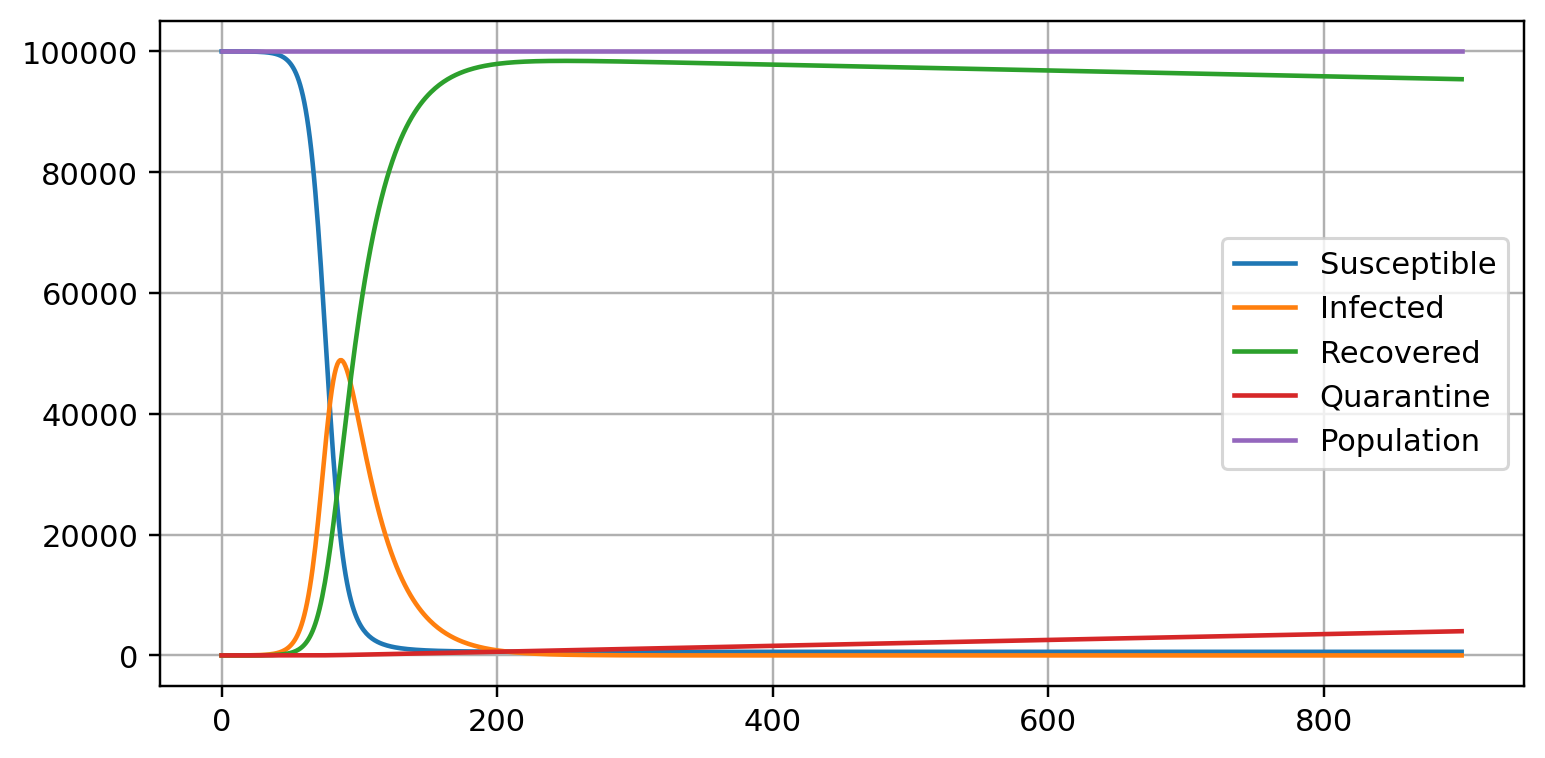

In [24]:
import numpy as np
import matplotlib.pyplot as plt
        

S0 = 99999
I0 = 1
Q0 = 0
R0 = 0

Population = S0 + I0 + Q0 + R0

Beta = [2E-5, 1E-5, 2E-6, 1E-6]

# Without Social Distancing: higher beta
# beta = Beta[0]

# With Social Distancing: lower beta
beta = Beta[2]

gamma = 0.00005
eta = 0.04

time = 900


def cutpop(x, lb, ub):
    if not (lb <= x <= ub):
        y = 0
    else:
        y = x
    return y


X0 = np.array([[S0, I0, Q0, R0]]).T
Z = np.zeros((time+1, 4, 1))
Z[0] = X0

for i in range(time):
    X_now = Z[i]
    S_now = X_now[0]
    I_now = X_now[1]
    Q_now = X_now[2]
    R_now = X_now[3]
    
    
    S_new = S_now - beta * S_now * I_now
    S_new = cutpop(S_new, 0.1, Population)
    
    I_new = I_now + beta * S_now * I_now - eta * I_now - gamma * I_now
    I_new = cutpop(I_new, 0.1, Population)
    
    Q_new = (1-gamma) * Q_now + eta * I_now 
    Q_new = cutpop(Q_new, 0.1, Population)
    
    R_new = Population - (S_new + I_new + Q_new)
  
    Z[i+1] = np.array([[S_new, I_new, Q_new, R_new]]).T
    
S = Z[:, 0, :]
I = Z[:, 1, :]
R = Z[:, 2, :]
Q = Z[:, 3, :]
N = S + I + Q + R

TIME = np.linspace(0, time, num=time+1, dtype='int')

plt.figure(figsize=(8,4), dpi=220)
plt.plot(TIME, S, label='Susceptible')
plt.plot(TIME, I, label='Infected')
plt.plot(TIME, R, label='Recovered')
plt.plot(TIME, Q, label='Quarantine')
plt.plot(TIME, N, label='Population')
plt.legend()
plt.grid()


In [25]:
for i in range(time + 1):
    print(f'Day {i}: S_{i} = {S[i][0]:.2f}, I_{i} = {I[i][0]:.2f}, Q_[i] = {Q[i][0]:.2f}, R_{i} = {R[i][0]:.2f}')

Day 0: S_0 = 99999.00, I_0 = 1.00, Q_[i] = 0.00, R_0 = 0.00
Day 1: S_1 = 99998.80, I_1 = 1.16, Q_[i] = 0.04, R_1 = 0.00
Day 2: S_2 = 99998.57, I_2 = 1.35, Q_[i] = 0.09, R_2 = 0.00
Day 3: S_3 = 99998.30, I_3 = 1.56, Q_[i] = 0.14, R_3 = 0.00
Day 4: S_4 = 99997.99, I_4 = 1.81, Q_[i] = 0.20, R_4 = 0.00
Day 5: S_5 = 99997.62, I_5 = 2.10, Q_[i] = 0.28, R_5 = 0.00
Day 6: S_6 = 99997.20, I_6 = 2.44, Q_[i] = 0.36, R_6 = 0.00
Day 7: S_7 = 99996.72, I_7 = 2.83, Q_[i] = 0.46, R_7 = 0.00
Day 8: S_8 = 99996.15, I_8 = 3.28, Q_[i] = 0.46, R_8 = 0.11
Day 9: S_9 = 99995.50, I_9 = 3.80, Q_[i] = 0.46, R_9 = 0.24
Day 10: S_10 = 99994.74, I_10 = 4.41, Q_[i] = 0.46, R_10 = 0.40
Day 11: S_11 = 99993.86, I_11 = 5.11, Q_[i] = 0.46, R_11 = 0.57
Day 12: S_12 = 99992.83, I_12 = 5.93, Q_[i] = 0.46, R_12 = 0.78
Day 13: S_13 = 99991.65, I_13 = 6.88, Q_[i] = 0.46, R_13 = 1.01
Day 14: S_14 = 99990.27, I_14 = 7.98, Q_[i] = 0.46, R_14 = 1.29
Day 15: S_15 = 99988.67, I_15 = 9.26, Q_[i] = 0.46, R_15 = 1.61
Day 16: S_16 = 9

## Vaccination
 - Move susceptible people ($S$) to the immuned group ($R$)

/var/folders/d1/r7rwb7dx3nzbm5pb0tlf2h_40000gn/T/ipykernel_8270/2152245206.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Z[i+1] = np.array([[S_new, I_new, R_new]]).T


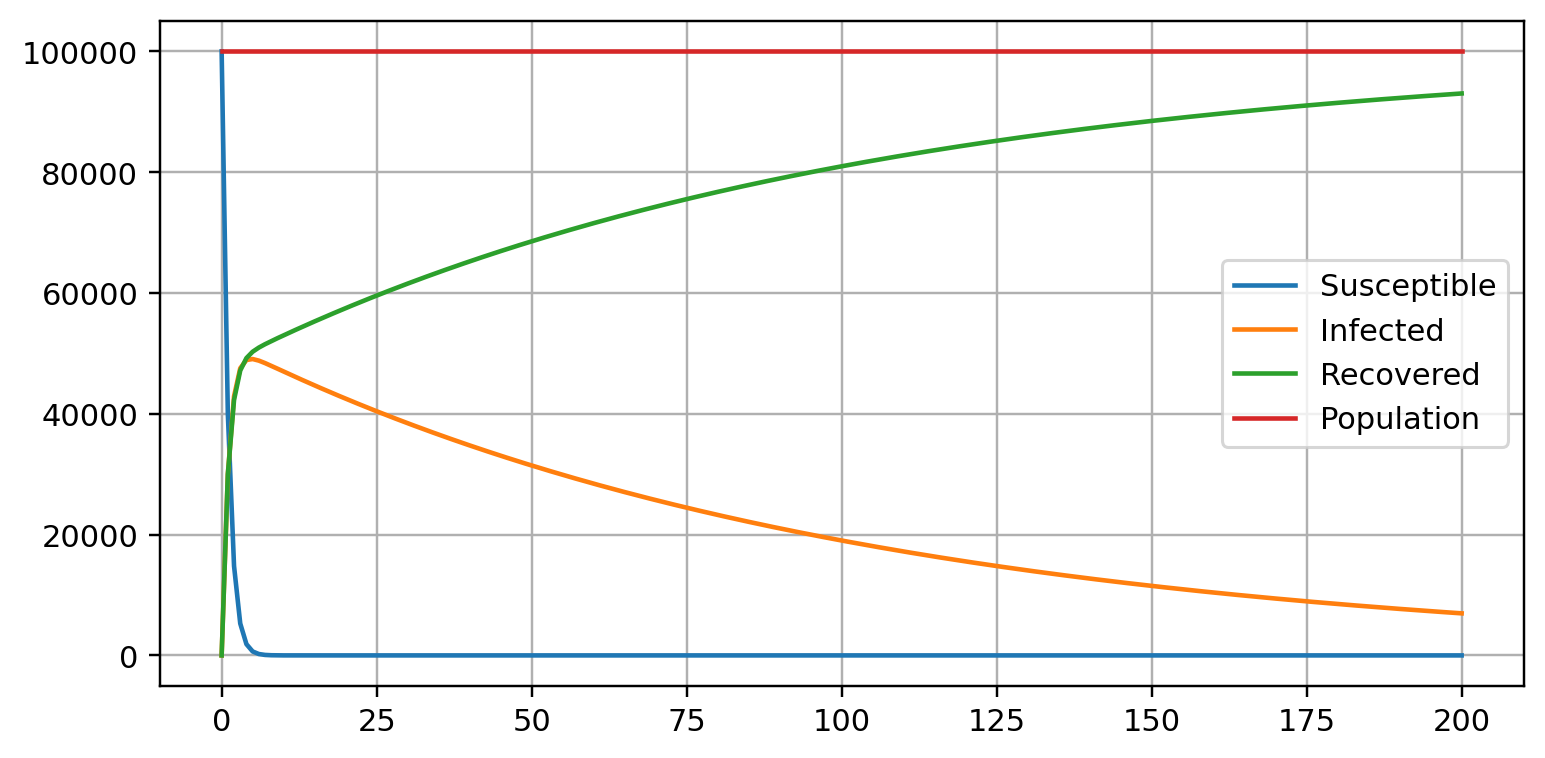

In [46]:
import numpy as np
import matplotlib.pyplot as plt
        

S0 = 99999
I0 = 1
R0 = 0
Population = S0 + I0 + R0

Beta = [2E-5, 1E-5, 2E-6, 1E-6]

# Without Social Distancing: higher beta
# beta = Beta[0]

# With Social Distancing: lower beta
beta = Beta[3]

gamma = 0.01
nu = 0.6
p = 0.5

time = 200


def cutpop(x, lb, ub):
    if not (lb <= x <= ub):
        y = 0
    else:
        y = x
    return y


X0 = np.array([[S0, I0, R0]]).T
Z = np.zeros((time+1, 3, 1))
Z[0] = X0

for i in range(time):
    X_now = Z[i]
    S_now = X_now[0]
    I_now = X_now[1]
    R_now = X_now[2]
    
    
    S_new = (1-nu)* S_now - beta * S_now * I_now
    S_new = cutpop(S_new, 0.1, Population)
    
    I_new = I_now + beta * S_now * I_now - gamma * I_now + (1-p)*nu*S_now
    I_new = cutpop(I_new, 0.1, Population)
    
    R_new = Population - (S_new + I_new)
  
    Z[i+1] = np.array([[S_new, I_new, R_new]]).T
    
S = Z[:, 0, :]
I = Z[:, 1, :]
R = Z[:, 2, :]
N = S + I + R

TIME = np.linspace(0, time, num=time+1, dtype='int')

plt.figure(figsize=(8,4), dpi=220)
plt.plot(TIME, S, label='Susceptible')
plt.plot(TIME, I, label='Infected')
plt.plot(TIME, R, label='Recovered')
plt.plot(TIME, N, label='Population')
plt.legend()
plt.grid()

In [45]:
for i in range(time + 1):
    print(f'Day {i}: S_{i} = {S[i][0]:.2f}, I_{i} = {I[i][0]:.2f}, R_{i} = {R[i][0]:.2f}')

Day 0: S_0 = 99999.00, I_0 = 1.00, R_0 = 0.00
Day 1: S_1 = 79999.10, I_1 = 10000.99, R_1 = 9999.91
Day 2: S_2 = 63199.21, I_2 = 18700.96, R_2 = 18099.83
Day 3: S_3 = 49377.48, I_3 = 26015.76, R_3 = 24606.76
Day 4: S_4 = 38217.39, I_4 = 31977.94, R_4 = 29804.67
Day 5: S_5 = 29351.80, I_5 = 36702.01, R_5 = 33946.18
Day 6: S_6 = 22404.17, I_6 = 40347.44, R_6 = 37248.39
Day 7: S_7 = 17019.39, I_7 = 43088.34, R_7 = 39892.28
Day 8: S_8 = 12882.17, I_8 = 45092.73, R_8 = 42025.10
Day 9: S_9 = 9724.84, I_9 = 46510.91, R_9 = 43764.24
Day 10: S_10 = 7327.56, I_10 = 47470.60, R_10 = 45201.84
Day 11: S_11 = 5514.21, I_11 = 48076.49, R_11 = 46409.30
Day 12: S_12 = 4146.26, I_12 = 48412.25, R_12 = 47441.48
Day 13: S_13 = 3116.28, I_13 = 48543.49, R_13 = 48340.23
Day 14: S_14 = 2341.75, I_14 = 48520.95, R_14 = 49137.30
Day 15: S_15 = 1759.78, I_15 = 48383.54, R_15 = 49856.68
Day 16: S_16 = 1322.68, I_16 = 48160.83, R_16 = 50516.49
Day 17: S_17 = 994.44, I_17 = 47875.19, R_17 = 51130.37
Day 18: S_18 = 